In [56]:
import numpy as np
import pandas as pd
import random
from random import  uniform
import statistics
import matplotlib.pyplot as plt

# Classe do neurônio de Rosenblatt

In [121]:
class Neuronio:
    
    def __init__(self):
        self.dados = np.array([])
        self.x_treino = np.array([])
        self.x_teste = np.array([])
        
        self.carrega_dados()
        
        self.pesos = np.array([
            uniform(-.5, .5),
            uniform(-.5, .5),
            uniform(-.5, .5)
        ])
        
        self.teta = 0
        self.ta   = 0.1
        self.vies = -1
        self.total_de_ajustes = []
        self.epocas = 0
        self.x1 = 0
        self.x2 = 0
        
    def carrega_dados_treino_e_teste(self):
        random.shuffle(self.dados)

        distribuicao = int(len(self.dados)*0.7)

        self.x_treino = self.dados[:distribuicao]
        self.x_teste  = self.dados[distribuicao:]
    
    def carrega_dados(self):
        dataset = np.fromfile('dataHoldout.txt')
        linhas  = len(dataset)//3
        colunas = 3
        self.dados = dataset.reshape(linhas, colunas)
        
        self.carrega_dados_treino_e_teste()
    
    def mostra_grafico(self):
        fig, ax = plt.subplots()
        for i in self.dados:
            x = i[0]
            y = i[1]
            yd = int(i[2])
            if(yd >= 1):
                plt.scatter(x,y, color='r', s=8)
            else:
                plt.scatter(x,y, color='b', s=8)

        ponto1 = [0,self.x1]
        ponto2 = [self.x2,0]
        x_values = [ponto1[0], ponto2[0]]
        y_values = [ponto1[1], ponto2[1]]

        ax.plot(x_values, y_values)
        plt.show()
        
    def funcao_ativacao(self,num):
        if (num>=self.teta):
            return 1
        else:
            return 0
        
    def perceptron(self):
        numero_de_ajustes = 0
        
        for i in self.dados:
            
            entrada = np.concatenate((np.array([self.vies]), i[:2]))
            yd = int(i[2:])
            yr = round(entrada.dot(self.pesos),4)
            yr = self.funcao_ativacao(yr)
            
            numero_de_ajustes += 1
            print("Dado: ",entrada[1:],"\n")
            self.pesos = self.ajuste_de_peso(yd, yr, entrada)
            
            if(yr != yd):
                self.total_de_ajustes.append(numero_de_ajustes)
                return False
            
        self.total_de_ajustes.append(numero_de_ajustes)
        return True

    def ajuste_de_peso(self, yd, yr, entrada):
        delta = self.ta * np.array(yd - yr).dot(entrada)
        novos_pesos = self.pesos + delta
        
        return novos_pesos
    
    def descobre_x1_x2(self):
        w = self.pesos
        
        w0_w2 = w[0]/w[2]
        w1_w2 = w[1]/w[2]

        self.x2 = w0_w2 - w1_w2 * 0
        self.x1 = w0_w2/w1_w2
    
    def treino(self):
        self.epocas = 1
        print("-----------------------------\nÉpoca: ",self.epocas,"\n")
        #100 epocas
        while(self.epocas<100):
            if(self.perceptron() == False):
                self.epocas += 1
                print("-----------------------------\nÉpoca: ",self.epocas,"\n")
            else:
                break
            
        self.descobre_x1_x2()

        print("Total de épocas: ",self.epocas)
        print("Total de ajustes feitos nos pesos: ",sum(self.total_de_ajustes))
        
n = Neuronio()

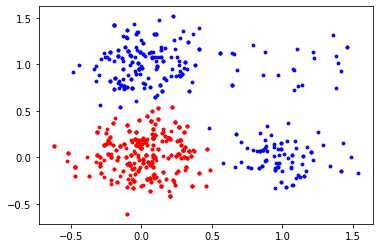

In [122]:
n.mostra_grafico()

In [123]:
n.dados = n.x_treino
n.treino()

-----------------------------
Época:  1 

Dado:  [-0.29322959 -0.09065359] 

-----------------------------
Época:  2 

Dado:  [-0.29322959 -0.09065359] 

-----------------------------
Época:  3 

Dado:  [-0.29322959 -0.09065359] 

-----------------------------
Época:  4 

Dado:  [-0.29322959 -0.09065359] 

-----------------------------
Época:  5 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [0.07988839 0.21101297] 

-----------------------------
Época:  6 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [0.07988839 0.21101297] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [0.46304142 0.09405471] 

-----------------------------
Época:  7 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [0.07988839 0.21101297] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [0.46304142 0.09405471] 

Dado:  [-0.07825563 -0.0


-----------------------------
Época:  10 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [0.07988839 0.21101297] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [0.46304142 0.09405471] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [0.08690974 0.00654493] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [0.27238274 0.18359397] 

Dado:  [ 0.0114998  -0.05939114] 

Dado:  [0.27238274 0.18359397] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [0.07988839 0.21101297] 

Dado:  [0.27238274 0.18359397] 

Dado:  [-0.06282733 -0.32877261] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [ 0.20013586 -0.41657686] 

Dado:  [0.08690974 0.00654493] 

Dado:  [0.27238274 0.18359397] 

Dado:  [0.07988839 0.21101297] 

Dado:  [0.2367801  0.37531654] 

-----------------------------
Época:  11 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [0.07988839 0.21101297] 

Dado:  [0.07988839 0.21101297] 



Dado:  [0.30399699 0.00645548] 

Dado:  [-0.22671361  0.21841371] 

Dado:  [0.2367801  0.37531654] 

Dado:  [0.30158872 0.27389296] 

Dado:  [-0.3001711   0.32724374] 

Dado:  [-0.24300515  0.15164356] 

Dado:  [-0.00474636  0.09826743] 

Dado:  [-0.02088851  0.14046572] 

Dado:  [-0.46980094 -0.20331005] 

Dado:  [-0.46980094 -0.20331005] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [-0.2502875   0.13876078] 

Dado:  [-0.0031101   0.18965456] 

Dado:  [-0.19649707 -0.11955184] 

Dado:  [-0.0180137   0.39719079] 

Dado:  [0.26482475 0.03523472] 

Dado:  [-0.02677506  0.19158953] 

Dado:  [-0.17369552 -0.02572443] 

Dado:  [0.26394155 0.32750883] 

Dado:  [0.46304142 0.09405471] 

Dado:  [ 0.03645874 -0.23372151] 

Dado:  [-0.0907412  -0.05805187] 

Dado:  [ 0.19028998 -0.01032709] 

Dado:  [-0.04716837  0.19363929] 

Dado:  [0.07785338 0.2471932 ] 

Dado:  [ 0.20013586 -0.41657686] 

Dado:  [0.25527419 0.17171587] 

Dado:  [0.24564694 0.0185413 ] 

Dado:  [-0.12350761  0.14385352] 

Dad

Dado:  [-0.10259311 -0.06961393] 

Dado:  [-0.21442938  0.00797897] 

Dado:  [-0.04716837  0.19363929] 

Dado:  [ 0.20013586 -0.41657686] 

Dado:  [-0.06775393 -0.12753433] 

Dado:  [0.14927021 0.30009393] 

Dado:  [0.32606995 0.33196305] 

Dado:  [0.30158872 0.27389296] 

Dado:  [-0.09127282  0.28768163] 

Dado:  [ 0.04322791 -0.0461912 ] 

Dado:  [-0.09127282  0.28768163] 

Dado:  [-0.29330698 -0.055651  ] 

Dado:  [-0.10074294 -0.31860073] 

Dado:  [ 0.15207387 -0.1526586 ] 

Dado:  [-0.0294872   0.13216526] 

Dado:  [ 0.1408635  -0.30766359] 

Dado:  [-0.21748562  0.03151915] 

Dado:  [0.34015635 0.06961302] 

Dado:  [-0.09127282  0.28768163] 

Dado:  [-0.0294872   0.13216526] 

Dado:  [-0.0150527  -0.12832773] 

Dado:  [0.21675147 0.54097717] 

Dado:  [-0.25504586  0.25995271] 

Dado:  [ 0.45659077 -0.31018866] 

Dado:  [0.12020386 0.40989806] 

Dado:  [ 0.05786483 -0.36451414] 

Dado:  [0.26482475 0.03523472] 

Dado:  [0.26394155 0.32750883] 

Dado:  [0.29560862 0.08406349] 

Dad

Dado:  [0.25527419 0.17171587] 

Dado:  [0.24564694 0.0185413 ] 

Dado:  [-0.12350761  0.14385352] 

Dado:  [-0.00474636  0.09826743] 

Dado:  [0.29560862 0.08406349] 

Dado:  [-0.23593942  0.18670953] 

Dado:  [0.26394155 0.32750883] 

Dado:  [-0.10074294 -0.31860073] 

Dado:  [0.04253339 0.4469942 ] 

Dado:  [0.03416729 0.17169338] 

Dado:  [ 0.19028998 -0.01032709] 

Dado:  [-0.0294872   0.13216526] 

Dado:  [0.07785338 0.2471932 ] 

Dado:  [0.25776183 0.03455125] 

Dado:  [0.1196882  0.08875686] 

Dado:  [0.02913203 0.02879716] 

Dado:  [-0.31482467  0.02071152] 

Dado:  [ 0.04322791 -0.0461912 ] 

Dado:  [0.21312794 0.95303668] 

Dado:  [-0.21442938  0.00797897] 

Dado:  [0.10637538 1.32165628] 

Dado:  [0.30158872 0.27389296] 

Dado:  [0.29560862 0.08406349] 

Dado:  [-0.51802769  0.04584568] 

Dado:  [0.01035887 0.19358383] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [0.01272533 0.20346543] 

Dado:  [-0.0458408  0.0510611] 

Dado:  [0.27238274 0.18359397] 

Dado:  [0.16775772 0.

Dado:  [-0.00474636  0.09826743] 

Dado:  [0.29560862 0.08406349] 

Dado:  [-0.23593942  0.18670953] 

Dado:  [0.26394155 0.32750883] 

Dado:  [-0.10074294 -0.31860073] 

Dado:  [0.04253339 0.4469942 ] 

Dado:  [0.03416729 0.17169338] 

Dado:  [ 0.19028998 -0.01032709] 

Dado:  [-0.0294872   0.13216526] 

Dado:  [0.07785338 0.2471932 ] 

Dado:  [0.25776183 0.03455125] 

Dado:  [0.1196882  0.08875686] 

Dado:  [0.02913203 0.02879716] 

Dado:  [-0.31482467  0.02071152] 

Dado:  [ 0.04322791 -0.0461912 ] 

Dado:  [0.21312794 0.95303668] 

Dado:  [-0.21442938  0.00797897] 

Dado:  [0.10637538 1.32165628] 

Dado:  [0.30158872 0.27389296] 

Dado:  [0.29560862 0.08406349] 

Dado:  [-0.51802769  0.04584568] 

Dado:  [0.01035887 0.19358383] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [0.01272533 0.20346543] 

Dado:  [-0.0458408  0.0510611] 

Dado:  [0.27238274 0.18359397] 

Dado:  [0.16775772 0.22831062] 

Dado:  [-0.0031101   0.18965456] 

Dado:  [-0.22958441  1.05209844] 

Dado:  [ 0.03645874

Dado:  [ 0.05814864 -0.23049015] 

Dado:  [0.12052833 0.52761443] 

Dado:  [0.0806008  0.02952231] 

Dado:  [ 0.06285892 -0.224167  ] 

Dado:  [0.15447827 1.03054581] 

Dado:  [-0.10907837  1.29389583] 

Dado:  [0.14000195 1.0836725 ] 

Dado:  [0.32202822 0.9463054 ] 

Dado:  [0.31144745 1.02817194] 

Dado:  [-0.29330698 -0.055651  ] 

Dado:  [0.30687156 0.11512797] 

Dado:  [0.09743172 0.24002227] 

Dado:  [-0.28620777  1.059365  ] 

Dado:  [0.00866547 0.79757433] 

Dado:  [0.24564694 0.0185413 ] 

Dado:  [-0.08482233  0.99780252] 

Dado:  [0.07028775 0.39056305] 

Dado:  [0.11872597 1.07687121] 

Dado:  [-0.06282733 -0.32877261] 

Dado:  [0.10637538 1.32165628] 

Dado:  [0.0971824  1.07365817] 

Dado:  [0.21265355 0.2789915 ] 

Dado:  [-0.09317084  1.13996994] 

Dado:  [ 0.07337792 -0.05966064] 

Dado:  [-0.1011677   1.27747558] 

Dado:  [ 0.08179828 -0.09956027] 

Dado:  [ 0.01047289 -0.025923  ] 

Dado:  [0.24510631 0.86940711] 

Dado:  [0.27663912 1.28227901] 

Dado:  [ 0.35751084

Dado:  [-0.26329819  0.12863801] 

Dado:  [0.09743172 0.24002227] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.00474636  0.09826743] 

Dado:  [0.19110701 0.2105866 ] 

Dado:  [-0.027351   -0.14271275] 

Dado:  [-0.0054924  -0.30231266] 

Dado:  [0.07028775 0.39056305] 

Dado:  [ 0.08179828 -0.09956027] 

Dado:  [-0.22671361  0.21841371] 

Dado:  [0.08097161 0.30854443] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.12350761  0.14385352] 

Dado:  [-0.15506501  0.12410647] 

Dado:  [0.07988839 0.21101297] 

Dado:  [0.2123362  0.02517371] 

Dado:  [-0.10259311 -0.06961393] 

Dado:  [-0.21442938  0.00797897] 

Dado:  [-0.04716837  0.19363929] 

Dado:  [ 0.20013586 -0.41657686] 

Dado:  [-0.06775393 -0.12753433] 

Dado:  [0.14927021 0.30009393] 

Dado:  [0.32606995 0.33196305] 

Dado:  [0.30158872 0.27389296] 

Dado:  [-0.09127282  0.28768163] 

Dado:  [ 0.04322791 -0.0461912 ] 

Dado:  [-0.09127282  0.28768163] 

Dado:  [-0.29330698 -0.055651  ] 

Dado:  [-0.10074294 -0.31860073] 

Dado:  


Dado:  [ 0.03645874 -0.23372151] 

Dado:  [ 0.12177941 -0.25516114] 

Dado:  [0.27238274 0.18359397] 

Dado:  [-0.0054924  -0.30231266] 

Dado:  [ 0.35751084 -0.30883258] 

Dado:  [-0.00474636  0.09826743] 

Dado:  [0.30687156 0.11512797] 

Dado:  [0.02463261 1.08867495] 

Dado:  [-0.26424484 -0.21427883] 

Dado:  [-0.07849193  1.09714508] 

Dado:  [ 0.1408635  -0.30766359] 

Dado:  [0.3509719  0.01024045] 

Dado:  [-0.1985048   1.41827045] 

Dado:  [0.40965325 1.15994907] 

Dado:  [-0.1576937   0.74716362] 

Dado:  [ 0.07337792 -0.05966064] 

Dado:  [-0.23436994  0.03978647] 

Dado:  [0.02913203 0.02879716] 

Dado:  [0.07180622 0.49468375] 

Dado:  [ 0.04322791 -0.0461912 ] 

Dado:  [-0.00754979  0.90007524] 

Dado:  [-0.04936663  1.08052058] 

Dado:  [-0.31482467  0.02071152] 

Dado:  [-0.0907412  -0.05805187] 

Dado:  [-0.03883705  0.13043894] 

Dado:  [-0.2622912   1.07843455] 

Dado:  [-0.23436994  0.03978647] 

Dado:  [-0.09317084  1.13996994] 

Dado:  [0.12959734 0.77748605] 



Dado:  [-0.26329819  0.12863801] 

Dado:  [0.09743172 0.24002227] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.00474636  0.09826743] 

Dado:  [0.19110701 0.2105866 ] 

Dado:  [-0.027351   -0.14271275] 

Dado:  [-0.0054924  -0.30231266] 

Dado:  [0.07028775 0.39056305] 

Dado:  [ 0.08179828 -0.09956027] 

Dado:  [-0.22671361  0.21841371] 

Dado:  [0.08097161 0.30854443] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.12350761  0.14385352] 

Dado:  [-0.15506501  0.12410647] 

Dado:  [0.07988839 0.21101297] 

Dado:  [0.2123362  0.02517371] 

Dado:  [-0.10259311 -0.06961393] 

Dado:  [-0.21442938  0.00797897] 

Dado:  [-0.04716837  0.19363929] 

Dado:  [ 0.20013586 -0.41657686] 

Dado:  [-0.06775393 -0.12753433] 

Dado:  [0.14927021 0.30009393] 

Dado:  [0.32606995 0.33196305] 

Dado:  [0.30158872 0.27389296] 

Dado:  [-0.09127282  0.28768163] 

Dado:  [ 0.04322791 -0.0461912 ] 

Dado:  [-0.09127282  0.28768163] 

Dado:  [-0.29330698 -0.055651  ] 

Dado:  [-0.10074294 -0.31860073] 

Dado:  

Dado:  [-0.16369884  1.15356926] 

Dado:  [0.14555276 0.70970773] 

Dado:  [ 0.01004054 -0.29692638] 

Dado:  [0.12052833 0.52761443] 

Dado:  [0.32715126 1.24407437] 

Dado:  [ 0.05814864 -0.23049015] 

Dado:  [0.12052833 0.52761443] 

Dado:  [0.0806008  0.02952231] 

Dado:  [ 0.06285892 -0.224167  ] 

Dado:  [0.15447827 1.03054581] 

Dado:  [-0.10907837  1.29389583] 

Dado:  [0.14000195 1.0836725 ] 

Dado:  [0.32202822 0.9463054 ] 

Dado:  [0.31144745 1.02817194] 

Dado:  [-0.29330698 -0.055651  ] 

Dado:  [0.30687156 0.11512797] 

Dado:  [0.09743172 0.24002227] 

Dado:  [-0.28620777  1.059365  ] 

Dado:  [0.00866547 0.79757433] 

Dado:  [0.24564694 0.0185413 ] 

Dado:  [-0.08482233  0.99780252] 

Dado:  [0.07028775 0.39056305] 

Dado:  [0.11872597 1.07687121] 

Dado:  [-0.06282733 -0.32877261] 

Dado:  [0.10637538 1.32165628] 

Dado:  [0.0971824  1.07365817] 

Dado:  [0.21265355 0.2789915 ] 

Dado:  [-0.09317084  1.13996994] 

Dado:  [ 0.07337792 -0.05966064] 

Dado:  [-0.1011677   

Dado:  [-0.3001711   0.32724374] 

Dado:  [-0.24300515  0.15164356] 

Dado:  [-0.00474636  0.09826743] 

Dado:  [-0.02088851  0.14046572] 

Dado:  [-0.46980094 -0.20331005] 

Dado:  [-0.46980094 -0.20331005] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [-0.2502875   0.13876078] 

Dado:  [-0.0031101   0.18965456] 

Dado:  [-0.19649707 -0.11955184] 

Dado:  [-0.0180137   0.39719079] 

Dado:  [0.26482475 0.03523472] 

Dado:  [-0.02677506  0.19158953] 

Dado:  [-0.17369552 -0.02572443] 

Dado:  [0.26394155 0.32750883] 

Dado:  [0.46304142 0.09405471] 

Dado:  [ 0.03645874 -0.23372151] 

Dado:  [-0.0907412  -0.05805187] 

Dado:  [ 0.19028998 -0.01032709] 

Dado:  [-0.04716837  0.19363929] 

Dado:  [0.07785338 0.2471932 ] 

Dado:  [ 0.20013586 -0.41657686] 

Dado:  [0.25527419 0.17171587] 

Dado:  [0.24564694 0.0185413 ] 

Dado:  [-0.12350761  0.14385352] 

Dado:  [-0.00474636  0.09826743] 

Dado:  [0.29560862 0.08406349] 

Dado:  [-0.23593942  0.18670953] 

Dado:  [0.26394155 0.32750883] 

D

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.12350761  0.14385352] 

Dado:  [-0.15506501  0.12410647] 

Dado:  [0.07988839 0.21101297] 

Dado:  [0.2123362  0.02517371] 

Dado:  [-0.10259311 -0.06961393] 

Dado:  [-0.21442938  0.00797897] 

Dado:  [-0.04716837  0.19363929] 

Dado:  [ 0.20013586 -0.41657686] 

Dado:  [-0.06775393 -0.12753433] 

Dado:  [0.14927021 0.30009393] 

Dado:  [0.32606995 0.33196305] 

Dado:  [0.30158872 0.27389296] 

Dado:  [-0.09127282  0.28768163] 

Dado:  [ 0.04322791 -0.0461912 ] 

Dado:  [-0.09127282  0.28768163] 

Dado:  [-0.29330698 -0.055651  ] 

Dado:  [-0.10074294 -0.31860073] 

Dado:  [ 0.15207387 -0.1526586 ] 

Dado:  [-0.0294872   0.13216526] 

Dado:  [ 0.1408635  -0.30766359] 

Dado:  [-0.21748562  0.03151915] 

Dado:  [0.34015635 0.06961302] 

Dado:  [-0.09127282  0.28768163] 

Dado:  [-0.0294872   0.13216526] 

Dado:  [-0.0150527  -0.12832773] 

Dado:  [0.21675147 0.54097717] 

Dado:  [-0.25504586  0.25995271] 

Dado:  [ 0.45659077 -0.31018866] 

D

Dado:  [0.24564694 0.0185413 ] 

Dado:  [-0.12350761  0.14385352] 

Dado:  [-0.00474636  0.09826743] 

Dado:  [0.29560862 0.08406349] 

Dado:  [-0.23593942  0.18670953] 

Dado:  [0.26394155 0.32750883] 

Dado:  [-0.10074294 -0.31860073] 

Dado:  [0.04253339 0.4469942 ] 

Dado:  [0.03416729 0.17169338] 

Dado:  [ 0.19028998 -0.01032709] 

Dado:  [-0.0294872   0.13216526] 

Dado:  [0.07785338 0.2471932 ] 

Dado:  [0.25776183 0.03455125] 

Dado:  [0.1196882  0.08875686] 

Dado:  [0.02913203 0.02879716] 

Dado:  [-0.31482467  0.02071152] 

Dado:  [ 0.04322791 -0.0461912 ] 

Dado:  [0.21312794 0.95303668] 

Dado:  [-0.21442938  0.00797897] 

Dado:  [0.10637538 1.32165628] 

Dado:  [0.30158872 0.27389296] 

Dado:  [0.29560862 0.08406349] 

Dado:  [-0.51802769  0.04584568] 

Dado:  [0.01035887 0.19358383] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [0.01272533 0.20346543] 

Dado:  [-0.0458408  0.0510611] 

Dado:  [0.27238274 0.18359397] 

Dado:  [0.16775772 0.22831062] 

Dado:  [-0.0031101   

Dado:  [-0.0294872   0.13216526] 

Dado:  [-0.0150527  -0.12832773] 

Dado:  [0.21675147 0.54097717] 

Dado:  [-0.25504586  0.25995271] 

Dado:  [ 0.45659077 -0.31018866] 

Dado:  [0.12020386 0.40989806] 

Dado:  [ 0.05786483 -0.36451414] 

Dado:  [0.26482475 0.03523472] 

Dado:  [0.26394155 0.32750883] 

Dado:  [0.29560862 0.08406349] 

Dado:  [ 0.0114998  -0.05939114] 

Dado:  [-0.26329819  0.12863801] 

Dado:  [ 0.48892004 -0.13726797] 

Dado:  [0.36729907 0.07514918] 

Dado:  [-0.0907412  -0.05805187] 

Dado:  [-0.05049252 -0.25006668] 

Dado:  [-0.52664262 -0.03855007] 

Dado:  [-0.11163154  0.00851976] 

Dado:  [-0.04716837  0.19363929] 

Dado:  [-0.18164836  0.0789158 ] 

Dado:  [0.09743172 0.24002227] 

Dado:  [0.02409823 0.16569508] 

Dado:  [ 0.28382866 -0.00689202] 

Dado:  [0.3509719  0.01024045] 

Dado:  [-0.18777062  0.42687831] 

Dado:  [-0.62237404  0.12119507] 

Dado:  [0.01035887 0.19358383] 

Dado:  [-0.08268563 -0.2708728 ] 

Dado:  [0.21675147 0.54097717] 

Dado:  

Dado:  [-0.31954642  0.82446805] 

Dado:  [-0.12531584  0.76885913] 

Dado:  [-0.15397487  0.54062754] 

-----------------------------
Época:  54 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [0.07988839 0.21101297] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [0.46304142 0.09405471] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [0.08690974 0.00654493] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [0.27238274 0.18359397] 

Dado:  [ 0.0114998  -0.05939114] 

Dado:  [0.27238274 0.18359397] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [0.07988839 0.21101297] 

Dado:  [0.27238274 0.18359397] 

Dado:  [-0.06282733 -0.32877261] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [ 0.20013586 -0.41657686] 

Dado:  [0.08690974 0.00654493] 

Dado:  [0.27238274 0.18359397] 

Dado:  [0.07988839 0.21101297] 

Dado:  [0.2367801  0.37531654] 

-----------------------------
Época:  55

Dado:  [0.21312794 0.95303668] 

Dado:  [-0.21442938  0.00797897] 

Dado:  [0.10637538 1.32165628] 

Dado:  [0.30158872 0.27389296] 

Dado:  [0.29560862 0.08406349] 

Dado:  [-0.51802769  0.04584568] 

Dado:  [0.01035887 0.19358383] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [0.01272533 0.20346543] 

Dado:  [-0.0458408  0.0510611] 

Dado:  [0.27238274 0.18359397] 

Dado:  [0.16775772 0.22831062] 

Dado:  [-0.0031101   0.18965456] 

Dado:  [-0.22958441  1.05209844] 

Dado:  [ 0.03645874 -0.23372151] 

Dado:  [-0.03883705  0.13043894] 

Dado:  [ 0.00976696 -0.02053641] 

Dado:  [-0.22393185  0.81629245] 

Dado:  [-0.26329819  0.12863801] 

Dado:  [-0.23593942  0.18670953] 

Dado:  [0.02409823 0.16569508] 

Dado:  [-0.28552876 -0.16910219] 

Dado:  [-0.62237404  0.12119507] 

Dado:  [-0.12531584  0.76885913] 

Dado:  [-0.31954642  0.82446805] 

Dado:  [-0.12531584  0.76885913] 

Dado:  [-0.15397487  0.54062754] 

Dado:  [-0.00474636  0.09826743] 

Dado:  [0.15371662 0.27078076] 

Dado:  

Dado:  [-0.10391518  0.34638192] 

Dado:  [-0.17369552 -0.02572443] 

Dado:  [-0.19908835  0.12926358] 

Dado:  [0.30399699 0.00645548] 

Dado:  [0.09743172 0.24002227] 

Dado:  [0.0824192  0.00106606] 

Dado:  [-0.12350761  0.14385352] 

Dado:  [ 0.05824952 -0.07760549] 

Dado:  [0.04253339 0.4469942 ] 

Dado:  [-0.07617946  0.02320954] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [-0.07617946  0.02320954] 

Dado:  [ 0.06627455 -0.26057051] 

Dado:  [-0.19908835  0.12926358] 

Dado:  [0.09743172 0.24002227] 

Dado:  [0.08097161 0.30854443] 

Dado:  [0.15371662 0.27078076] 

Dado:  [0.28066172 0.13031361] 

Dado:  [-0.25504586  0.25995271] 

Dado:  [0.28066172 0.13031361] 

Dado:  [ 0.05824952 -0.07760549] 

Dado:  [0.17537603 0.17826557] 

Dado:  [0.00359837 0.18216627] 

Dado:  [-0.0180137   0.39719079] 

Dado:  [0.02409823 0.16569508] 

Dado:  [-0.11163154  0.00851976] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [-0.05049252 -0.25006668] 

Dado:  [-0.05049252 -0.25006668] 

Dado:  [-

Dado:  [-0.2175649  -0.24798023] 

Dado:  [-0.1985048   1.41827045] 

Dado:  [-0.04737586  0.93179216] 

Dado:  [-0.09643162 -0.23454603] 

Dado:  [-0.04716837  0.19363929] 

Dado:  [0.07186273 1.07471211] 

Dado:  [-0.21442938  0.00797897] 

Dado:  [-0.31310084  0.27736732] 

Dado:  [-0.18164836  0.0789158 ] 

Dado:  [0.21675147 0.54097717] 

Dado:  [-0.1882854   0.85202358] 

Dado:  [0.26852925 1.03941518] 

Dado:  [-0.02088851  0.14046572] 

Dado:  [ 0.03645874 -0.23372151] 

Dado:  [-0.15506501  0.12410647] 

Dado:  [-0.1753094  -0.26744178] 

Dado:  [0.19643799 0.20349331] 

Dado:  [ 0.03645874 -0.23372151] 

Dado:  [ 0.12177941 -0.25516114] 

Dado:  [0.27238274 0.18359397] 

Dado:  [-0.0054924  -0.30231266] 

Dado:  [ 0.35751084 -0.30883258] 

Dado:  [-0.00474636  0.09826743] 

Dado:  [0.30687156 0.11512797] 

Dado:  [0.02463261 1.08867495] 

Dado:  [-0.26424484 -0.21427883] 

Dado:  [-0.07849193  1.09714508] 

Dado:  [ 0.1408635  -0.30766359] 

Dado:  [0.3509719  0.01024045] 

D

Dado:  [0.30687156 0.11512797] 

Dado:  [0.09743172 0.24002227] 

Dado:  [-0.28620777  1.059365  ] 

Dado:  [0.00866547 0.79757433] 

Dado:  [0.24564694 0.0185413 ] 

Dado:  [-0.08482233  0.99780252] 

Dado:  [0.07028775 0.39056305] 

Dado:  [0.11872597 1.07687121] 

Dado:  [-0.06282733 -0.32877261] 

Dado:  [0.10637538 1.32165628] 

Dado:  [0.0971824  1.07365817] 

Dado:  [0.21265355 0.2789915 ] 

Dado:  [-0.09317084  1.13996994] 

Dado:  [ 0.07337792 -0.05966064] 

Dado:  [-0.1011677   1.27747558] 

Dado:  [ 0.08179828 -0.09956027] 

Dado:  [ 0.01047289 -0.025923  ] 

Dado:  [0.24510631 0.86940711] 

Dado:  [0.27663912 1.28227901] 

Dado:  [ 0.35751084 -0.30883258] 

Dado:  [0.14555276 0.70970773] 

Dado:  [0.29018767 0.89401935] 

Dado:  [-0.0754456   0.83677898] 

Dado:  [0.1460631 0.1776204] 

Dado:  [-0.01545201  0.94861297] 

Dado:  [0.19643799 0.20349331] 

Dado:  [0.24564694 0.0185413 ] 

Dado:  [-0.01249701  1.13463856] 

Dado:  [-0.31310084  0.27736732] 

Dado:  [0.01272533 

Dado:  [-0.18164836  0.0789158 ] 

Dado:  [0.09743172 0.24002227] 

Dado:  [0.02409823 0.16569508] 

Dado:  [ 0.28382866 -0.00689202] 

Dado:  [0.3509719  0.01024045] 

Dado:  [-0.18777062  0.42687831] 

Dado:  [-0.62237404  0.12119507] 

Dado:  [0.01035887 0.19358383] 

Dado:  [-0.08268563 -0.2708728 ] 

Dado:  [0.21675147 0.54097717] 

Dado:  [0.0806008  0.02952231] 

Dado:  [-0.10391518  0.34638192] 

Dado:  [-0.01465206  0.12680101] 

Dado:  [-0.22671361  0.21841371] 

Dado:  [ 0.35751084 -0.30883258] 

Dado:  [0.25776183 0.03455125] 

Dado:  [ 0.12177941 -0.25516114] 

Dado:  [0.16775772 0.22831062] 

Dado:  [0.12052833 0.52761443] 

Dado:  [0.3509719  0.01024045] 

Dado:  [0.19643799 0.20349331] 

Dado:  [-0.31310084  0.27736732] 

Dado:  [0.08298076 0.12868493] 

Dado:  [-0.38616416  0.00437877] 

Dado:  [0.30399699 0.00645548] 

Dado:  [-0.22671361  0.21841371] 

Dado:  [0.2367801  0.37531654] 

Dado:  [0.30158872 0.27389296] 

Dado:  [-0.3001711   0.32724374] 

Dado:  [-0.2430

Dado:  [-0.46833414 -0.10620722] 

Dado:  [0.29560862 0.08406349] 

Dado:  [-0.29356844  0.00599321] 

Dado:  [0.07028775 0.39056305] 

Dado:  [0.34015635 0.06961302] 

Dado:  [-0.06282733 -0.32877261] 

Dado:  [0.02409823 0.16569508] 

Dado:  [0.12020386 0.40989806] 

Dado:  [-0.06282733 -0.32877261] 

Dado:  [0.20300365 0.19595358] 

Dado:  [0.32606995 0.33196305] 

Dado:  [0.07028775 0.39056305] 

Dado:  [-0.04254102  0.26891466] 

Dado:  [-0.07617946  0.02320954] 

Dado:  [-0.10391518  0.34638192] 

Dado:  [ 0.40646314 -0.16905173] 

Dado:  [-0.01465206  0.12680101] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [ 0.08179828 -0.09956027] 

Dado:  [-0.09127282  0.28768163] 

Dado:  [-0.10391518  0.34638192] 

Dado:  [-0.17369552 -0.02572443] 

Dado:  [-0.19908835  0.12926358] 

Dado:  [0.30399699 0.00645548] 

Dado:  [0.09743172 0.24002227] 

Dado:  [0.0824192  0.00106606] 

Dado:  [-0.12350761  0.14385352] 

Dado:  [ 0.05824952 -0.07760549] 

Dado:  [0.04253339 0.4469942 ] 

Dado:  [-

Dado:  [0.08690974 0.00654493] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [0.27238274 0.18359397] 

Dado:  [ 0.0114998  -0.05939114] 

Dado:  [0.27238274 0.18359397] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [0.07988839 0.21101297] 

Dado:  [0.27238274 0.18359397] 

Dado:  [-0.06282733 -0.32877261] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [ 0.20013586 -0.41657686] 

Dado:  [0.08690974 0.00654493] 

Dado:  [0.27238274 0.18359397] 

Dado:  [0.07988839 0.21101297] 

Dado:  [0.2367801  0.37531654] 

Dado:  [ 0.05786483 -0.36451414] 

Dado:  [0.46304142 0.09405471] 

Dado:  [0.27238274 0.18359397] 

Dado:  [0.34015635 0.06961302] 

Dado:  [-0.04254102  0.26891466] 

Dado:  [ 0.05786483 -0.36451414] 

Dado:  [ 0.0114998  -0.05939114] 

Dado:  [-0.01465206  0.12680101] 

Dado:  [0.25527419 0.17171587] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [0.34015635 0.06961302] 

Dado:  [0.29560862 0.08406349] 

Dado:  [-0.12350761  0.14385352] 

Dado:  [-0.468334

Dado:  [0.20300365 0.19595358] 

Dado:  [0.32606995 0.33196305] 

Dado:  [0.07028775 0.39056305] 

Dado:  [-0.04254102  0.26891466] 

Dado:  [-0.07617946  0.02320954] 

Dado:  [-0.10391518  0.34638192] 

Dado:  [ 0.40646314 -0.16905173] 

Dado:  [-0.01465206  0.12680101] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [ 0.08179828 -0.09956027] 

Dado:  [-0.09127282  0.28768163] 

Dado:  [-0.10391518  0.34638192] 

Dado:  [-0.17369552 -0.02572443] 

Dado:  [-0.19908835  0.12926358] 

Dado:  [0.30399699 0.00645548] 

Dado:  [0.09743172 0.24002227] 

Dado:  [0.0824192  0.00106606] 

Dado:  [-0.12350761  0.14385352] 

Dado:  [ 0.05824952 -0.07760549] 

Dado:  [0.04253339 0.4469942 ] 

Dado:  [-0.07617946  0.02320954] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [-0.07617946  0.02320954] 

Dado:  [ 0.06627455 -0.26057051] 

Dado:  [-0.19908835  0.12926358] 

Dado:  [0.09743172 0.24002227] 

Dado:  [0.08097161 0.30854443] 

Dado:  [0.15371662 0.27078076] 

Dado:  [0.28066172 0.13031361] 

Dado:  

Dado:  [ 0.0114998  -0.05939114] 

Dado:  [-0.26329819  0.12863801] 

Dado:  [ 0.48892004 -0.13726797] 

Dado:  [0.36729907 0.07514918] 

Dado:  [-0.0907412  -0.05805187] 

Dado:  [-0.05049252 -0.25006668] 

Dado:  [-0.52664262 -0.03855007] 

Dado:  [-0.11163154  0.00851976] 

Dado:  [-0.04716837  0.19363929] 

Dado:  [-0.18164836  0.0789158 ] 

Dado:  [0.09743172 0.24002227] 

Dado:  [0.02409823 0.16569508] 

Dado:  [ 0.28382866 -0.00689202] 

Dado:  [0.3509719  0.01024045] 

Dado:  [-0.18777062  0.42687831] 

Dado:  [-0.62237404  0.12119507] 

Dado:  [0.01035887 0.19358383] 

Dado:  [-0.08268563 -0.2708728 ] 

Dado:  [0.21675147 0.54097717] 

Dado:  [0.0806008  0.02952231] 

Dado:  [-0.10391518  0.34638192] 

Dado:  [-0.01465206  0.12680101] 

Dado:  [-0.22671361  0.21841371] 

Dado:  [ 0.35751084 -0.30883258] 

Dado:  [0.25776183 0.03455125] 

Dado:  [ 0.12177941 -0.25516114] 

Dado:  [0.16775772 0.22831062] 

Dado:  [0.12052833 0.52761443] 

Dado:  [0.3509719  0.01024045] 

Dado:  

Dado:  [ 0.05786483 -0.36451414] 

Dado:  [0.46304142 0.09405471] 

Dado:  [0.27238274 0.18359397] 

Dado:  [0.34015635 0.06961302] 

Dado:  [-0.04254102  0.26891466] 

Dado:  [ 0.05786483 -0.36451414] 

Dado:  [ 0.0114998  -0.05939114] 

Dado:  [-0.01465206  0.12680101] 

Dado:  [0.25527419 0.17171587] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [0.34015635 0.06961302] 

Dado:  [0.29560862 0.08406349] 

Dado:  [-0.12350761  0.14385352] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [0.29560862 0.08406349] 

Dado:  [-0.29356844  0.00599321] 

Dado:  [0.07028775 0.39056305] 

Dado:  [0.34015635 0.06961302] 

Dado:  [-0.06282733 -0.32877261] 

Dado:  [0.02409823 0.16569508] 

Dado:  [0.12020386 0.40989806] 

Dado:  [-0.06282733 -0.32877261] 

Dado:  [0.20300365 0.19595358] 

Dado:  [0.32606995 0.33196305] 

Dado:  [0.07028775 0.39056305] 

Dado:  [-0.04254102  0.26891466] 

Dado:  [-0.07617946  0.02320954] 

Dado:  [-0.10391518  0.34638192] 

Dado:  [ 0.40646314 -0.16905173] 

Dado:  [-0.01

Dado:  [0.16775772 0.22831062] 

Dado:  [-0.0031101   0.18965456] 

Dado:  [-0.22958441  1.05209844] 

Dado:  [ 0.03645874 -0.23372151] 

Dado:  [-0.03883705  0.13043894] 

Dado:  [ 0.00976696 -0.02053641] 

Dado:  [-0.22393185  0.81629245] 

Dado:  [-0.26329819  0.12863801] 

Dado:  [-0.23593942  0.18670953] 

Dado:  [0.02409823 0.16569508] 

Dado:  [-0.28552876 -0.16910219] 

Dado:  [-0.62237404  0.12119507] 

Dado:  [-0.12531584  0.76885913] 

Dado:  [-0.31954642  0.82446805] 

Dado:  [-0.12531584  0.76885913] 

Dado:  [-0.15397487  0.54062754] 

-----------------------------
Época:  89 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [0.07988839 0.21101297] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [0.46304142 0.09405471] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [0.08690974 0.00654493] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [0.27238274 0.1835939

Dado:  [0.2123362  0.02517371] 

Dado:  [-0.26329819  0.12863801] 

Dado:  [0.09743172 0.24002227] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.00474636  0.09826743] 

Dado:  [0.19110701 0.2105866 ] 

Dado:  [-0.027351   -0.14271275] 

Dado:  [-0.0054924  -0.30231266] 

Dado:  [0.07028775 0.39056305] 

Dado:  [ 0.08179828 -0.09956027] 

Dado:  [-0.22671361  0.21841371] 

Dado:  [0.08097161 0.30854443] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.12350761  0.14385352] 

Dado:  [-0.15506501  0.12410647] 

Dado:  [0.07988839 0.21101297] 

Dado:  [0.2123362  0.02517371] 

Dado:  [-0.10259311 -0.06961393] 

Dado:  [-0.21442938  0.00797897] 

Dado:  [-0.04716837  0.19363929] 

Dado:  [ 0.20013586 -0.41657686] 

Dado:  [-0.06775393 -0.12753433] 

Dado:  [0.14927021 0.30009393] 

Dado:  [0.32606995 0.33196305] 

Dado:  [0.30158872 0.27389296] 

Dado:  [-0.09127282  0.28768163] 

Dado:  [ 0.04322791 -0.0461912 ] 

Dado:  [-0.09127282  0.28768163] 

Dado:  [-0.29330698 -0.055651  ] 

Dado:  [-

Dado:  [-0.46833414 -0.10620722] 

Dado:  [0.29560862 0.08406349] 

Dado:  [-0.29356844  0.00599321] 

Dado:  [0.07028775 0.39056305] 

Dado:  [0.34015635 0.06961302] 

Dado:  [-0.06282733 -0.32877261] 

Dado:  [0.02409823 0.16569508] 

Dado:  [0.12020386 0.40989806] 

Dado:  [-0.06282733 -0.32877261] 

Dado:  [0.20300365 0.19595358] 

Dado:  [0.32606995 0.33196305] 

Dado:  [0.07028775 0.39056305] 

Dado:  [-0.04254102  0.26891466] 

Dado:  [-0.07617946  0.02320954] 

Dado:  [-0.10391518  0.34638192] 

Dado:  [ 0.40646314 -0.16905173] 

Dado:  [-0.01465206  0.12680101] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [ 0.08179828 -0.09956027] 

Dado:  [-0.09127282  0.28768163] 

Dado:  [-0.10391518  0.34638192] 

Dado:  [-0.17369552 -0.02572443] 

Dado:  [-0.19908835  0.12926358] 

Dado:  [0.30399699 0.00645548] 

Dado:  [0.09743172 0.24002227] 

Dado:  [0.0824192  0.00106606] 

Dado:  [-0.12350761  0.14385352] 

Dado:  [ 0.05824952 -0.07760549] 

Dado:  [0.04253339 0.4469942 ] 

Dado:  [-

Dado:  [-0.00474636  0.09826743] 

Dado:  [0.15371662 0.27078076] 

Dado:  [ 0.1408635  -0.30766359] 

Dado:  [-0.37025595 -0.19697218] 

Dado:  [0.06202681 0.75874289] 

Dado:  [0.26357898 0.89001155] 

Dado:  [ 0.17261639 -0.23042727] 

Dado:  [ 0.10182486 -0.21442921] 

Dado:  [0.07180622 0.49468375] 

Dado:  [ 0.00976696 -0.02053641] 

Dado:  [0.20851547 0.87522108] 

Dado:  [-0.37025595 -0.19697218] 

Dado:  [0.24890183 1.0739442 ] 

Dado:  [0.22481021 1.51639247] 

Dado:  [0.2367801  0.37531654] 

Dado:  [-0.15506501  0.12410647] 

Dado:  [ 0.31474715 -0.09874167] 

Dado:  [ 0.40646314 -0.16905173] 

Dado:  [-0.13901236  1.07240867] 

Dado:  [-0.2175649  -0.24798023] 

Dado:  [-0.1985048   1.41827045] 

Dado:  [-0.04737586  0.93179216] 

Dado:  [-0.09643162 -0.23454603] 

Dado:  [-0.04716837  0.19363929] 

Dado:  [0.07186273 1.07471211] 

Dado:  [-0.21442938  0.00797897] 

Dado:  [-0.31310084  0.27736732] 

Dado:  [-0.18164836  0.0789158 ] 

Dado:  [0.21675147 0.54097717] 

Dado:

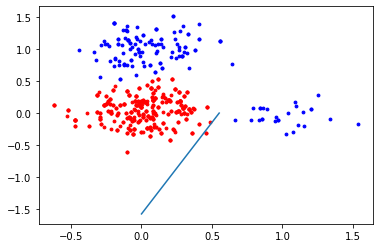

In [124]:
n.mostra_grafico()

In [150]:
def previsao():
    numero_de_acertos = 0
    numero_de_erros   = 0
    for i in n.x_teste:
        entrada = np.concatenate((np.array([n.vies]), i[:2]))
        
        yd = int(i[2:])
        yr = round(entrada.dot(n.pesos),4)
        yr = n.funcao_ativacao(yr)
        
        if(yr == yd):
            numero_de_acertos+=1
        else:
            numero_de_erros+=1
            
    return numero_de_acertos, numero_de_erros

In [151]:
numero_de_acertos, numero_de_erros = previsao()

In [155]:
print("Quantidade de acertos: ", numero_de_acertos, "\nQuantidade de erros  : " ,numero_de_erros)

Quantidade de acertos:  236 
Quantidade de erros  :  4
